# Training Models

In [1]:
# Generate some linear-looking data
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

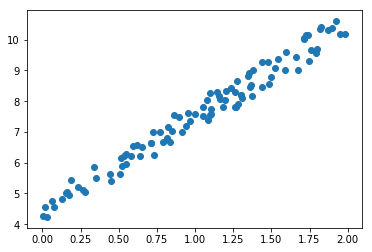

In [2]:
# Plot the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

In [3]:
# Compute the coefficients using the normal equation
# We will compute the inverse of the matrix and use .dot() for
# matrix multiplication
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# The actual function that we used to generate the data is
# y = 4 + 3x + Gaussian noise. Let's see what the equation found:
theta_best

array([[4.4299505 ],
       [3.06469962]])

In [5]:
# Now we can make predictions using theta hat:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.4299505 ],
       [10.55934973]])

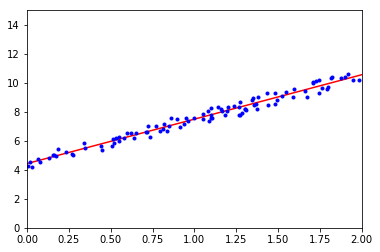

In [6]:
# Let's plot this model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# The equivalent code using scikit-learn looks like this:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.4299505]), array([[3.06469962]]))

In [8]:
# We can also compute the prediction
lin_reg.predict(X_new)

array([[ 4.4299505 ],
       [10.55934973]])

# Batch Gradient Descent

In [9]:
# Gradient Descent is a very generic optimization algorithm capable of finding
# optimal solutions to a wide range of problems. The general idea of Gradient
# Descent is to tweak parameters iteratively in order to minimize a cost
# function.

In [10]:
# Implementation of the Gradient Descent step algorithm
import numpy as np

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
# Let's look at the resulting theta:
theta

array([[4.4299505 ],
       [3.06469962]])

In [12]:
# This value is ecxactly what the normal equation found.

# Stochastic Gradient Descent

In [13]:
# The Batch Gradient Descent always uses the entire training set, which
# makes it pretty slow. At the oppposite extreme, stochastic gradient descent
# just picks a random instance in the training set at every step, and computes
# the gradients based only on that single instance. However, due to the random
# nature of this process, the algorithm will find good, but not optimal results.

# One solution to this is to reduce the learning rate as the algorithm moves
# towards the minimum (create a learning schedule).

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m * i)
        theta = theta - eta * gradients

In [14]:
# By convention we iterate by rounds of m iterations; each round is called an
# epoch. While the Batch Gradient Descent code iterated 1,000 times through
# the whole training set, this code goes through the training set only 50
# times and reaches a fairly good solution:
theta

array([[4.46015765],
       [2.97870723]])

In [15]:
# To perform Linear Regression using SGD with Scikit-Learn, you can use the
# SGDRegressor class, which defaults to optimizing the squared error cost
# function. The following code runs 50 epochs, starting with a learning rate
# of 0.1 (eta0=0.1), using the default learning schedule (different from the
# preceding one), and it does not use any regularization (penalty=None; more
# details on this shortly):
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [16]:
# Once again, you find a solution very close to the one returned by the
# Normal Equation
sgd_reg.intercept_, sgd_reg.coef_

(array([4.41051676]), array([3.04759017]))

In [17]:
# MINI BATCH GRADIENT DESCENT
# The last option would be to use mini batches instead of the whole
# batch or single instances as a compromise.

# Polynomial Regression

In [18]:
# Surprisingly, we can fit a linear model to fit nonlinear data.
# A simple way to do this is to add powers of each feature as new features,
# then train a linear model on this extended set of features. This is called
# Polynomial Regression.

In [19]:
# First, we generate some data based on a quadratic equation.
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

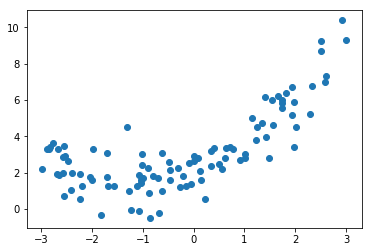

In [20]:
# We plot the data
plt.scatter(X, y)
plt.show()

In [21]:
# Clearly a straight line won't fit, so we try a 2nd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.00556601])

In [22]:
# X_poly should now contain the original AND the square of this value
X_poly[0]

array([-1.00556601,  1.011163  ])

In [23]:
# Now we can fit a Linear Regression model including the polynomial terms
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06422098]), array([[1.06535994, 0.46168875]]))

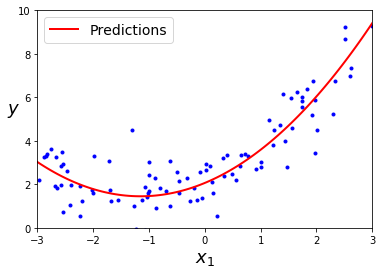

In [24]:
# Let's plot the regression line

# linspace returns evenly spaced numbers over a specified interval
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.") # b. means blue dots
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") # r- means red line
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

In [25]:
# LEARNING CURVES
# Learning curves are plots of the model's performance on the training set and
# the validation set as a function of the training set size.
# To generate the plots, simply train the model several times on different sized
# subsets of the training set.

In [26]:
# The following code defines a function that plots
# the learning curves of a model given some training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

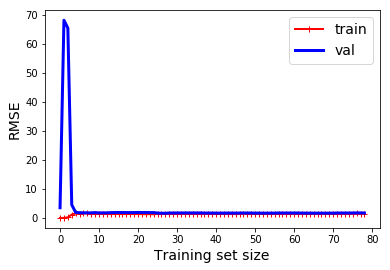

In [27]:
# Plot the learning curves
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

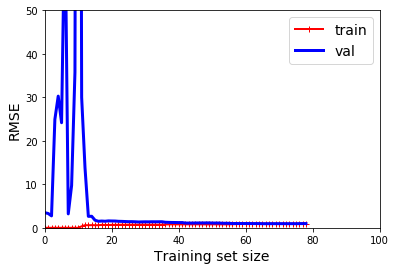

In [28]:
# Now let's look at the learning curves of a 10th degree polynomial model
# on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 100, 0, 50])
plt.show()

In [29]:
# The large gap means that the 10th degree polynomial model performs
# significantly better on the training set than on the test set, which
# shouldn't be too surprising. Of course the error on the training data
# is much lower, but the model does not generalize well.

# Regularized Linear Models

In [30]:
# As we saw in Chapters 1 and 2, a good way to reduce overfitting is to
# regularize the model (i.e., to constrain it): the fewer degrees of freedom
# it has, the harder it will be for it to overfit the data. For example, a
# simple way to regularize a polynomial model is to reduce the number of
# polynomial degrees.

# For a linear model, regularization is typically achieved by constraining the
# weights of the model. We will now look at Ridge Regression, Lasso Regression,
# and Elastic Net, which implement three different ways to constrain the
# weights.

# Ridge Regression

In [31]:
# Ridge Regression is a regularized version of Linear Regression, which is
# achieved by adding a regularization term to the cost function. This forces
# the model not only to fit data, but also keep the model weights as small as
# possible. Note that the term should only be added to the cost function during
# training. Once the model is trained, you want to evaluate the model's
# performance using the unregularized performance measure.

In [32]:
# The hyperparameter alpha controls how much you want to regularize the model.
# If alpha = 0 then the Ridge Regression is just a Linear Regression. If alpha
# is very large, then all weights end up very close to zero and the result is
# a flat line going through the data's mean.

In [33]:
# Performing Ridge Regression on our random data ...
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.6956921]])

In [34]:
# ... and using stochastic gradient descent. (setting the penalty to l2
# is performing the Ridge Regression)
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.66639316])

# Lasso Regression

In [35]:
# LASSO = Least Absolute Shrinkage and Selection Operator Regression
# Like Ridge Regression, it adds a regularization term to the cost function.
# It tends to completely eliminate thte weights of the least important
# features (i.e., set them to zero)

# In other words, Lasso Regression automatically performs feature selection
# and outputs a sparse model (i.e. with few nonzero feature weights)

In [36]:
# Performing Lasso Regression ...
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.63892231])

In [37]:
# ... and using stochastic gradient descent. (setting the penalty to l1
# is performing the Lasso Regression)
sgd_reg = SGDRegressor(max_iter=5, penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.6782565])

# Elastic Net

In [38]:
# Elastic Net is a middle ground between Ridge Regression and Lasso Regression.
# The regularization term is a simple mix of both Ridge and Lasso’s
# regularization terms, and you can control the mix ratio r.

In [39]:
# Performing Elastic Net Regression ...
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.64287532])

In [40]:
# ... and using stochastic gradient descent. (setting the penalty to elasticnet
# is performing the Elastic Net Regression)
sgd_reg = SGDRegressor(max_iter=5, penalty="elasticnet")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.67926709])

# Early Stopping

In [ ]:
# A different way to regularize iterative learning algorithms is to stop
# training as soon as the validation error reaches a minimum. This is called
# early stopping.

In [55]:
# Basic implementation of early stopping:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Generating polynomials
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)

# Scaling
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.fit_transform(X_val_poly)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate = "constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_model

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gr

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gr

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

# Summary: Regularized Linear Models

In [41]:
# So when should you use Linear Regression, Ridge, Lasso, or Elastic Net?
# It is almost always preferable to have at least a little bit of
# regularization, so generally you should avoid plain Linear Regression.
# Ridge is a good default, but if you suspect that only a few features are
# actually useful, you should prefer Lasso or Elastic Net since they tend
# to reduce the useless features’ weights down to zero as we have discussed.
# In general, Elastic Net is preferred over Lasso since Lasso may behave
# erratically when the number of features is greater than the number of
# training instances or when several features are strongly correlated.

# Logistic Regression

In [56]:
# Logistic Regression is commonly used for classification. It computes
# a possibility that a record belongs to a certain class (binary classifier).

# The logistic (also called logit) is a sigmoid function that outputs a number
# between 0 and 1

# Training and Cost Function

In [57]:
# Good, now you know how a Logistic Regression model estimates probabilities and
# makes predictions. But how is it trained? The objective of training is to set
# the parameter vector θ so that the model estimates high probabilities for
# positive instances (y = 1) and low probabilities for negative instances
# (y = 0). This idea is captured by the cost function:
    # log(phat) if y = 1
    # log(1 - phat) if y = 0

In [58]:
# Bad news: there is no closed form for the cost function
# Good news: Gradient Descent is guaranteed to find global minimum

# Logistic Regression: Decision Boundaries

In [59]:
# Let’s try to build a classifier to detect the Iris-Virginica type based only
# on the petal width feature. First let’s load the data:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [60]:
# Define feature and target
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virgninica, else 0

In [61]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

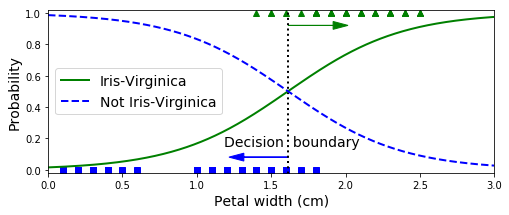

In [66]:
# Let's look at the model's estimated probabilities for flowers with petal
# widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary",
         fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05,
          head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05,
          head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [67]:
# We see a boundary at around 1.6 cm petal width
log_reg.predict([[1.7], [1.5]])

array([1, 0])

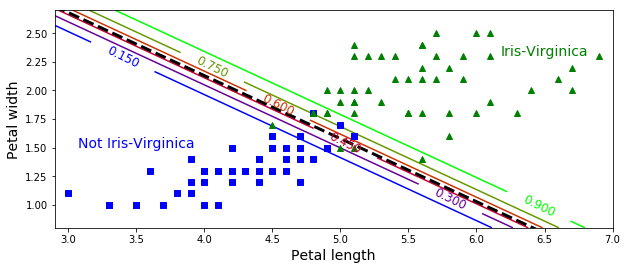

In [70]:
# Plot the classified records
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [71]:
# The hyperparameter controlling the regularization strength of a
# Scikit-Learn LogisticRegression model is not alpha (as in other
# linear models), but its inverse: C. The higher the value of C, the less
# the model is regularized.

# Softmax Regression

In [72]:
# The Logistic Regression model can be generalized to support multiple classes
# directly, without having to train and combine multiple binary classifiers.
# This is called Softmax Regression, or Multinomial Logistic Regression.

# The idea is quite simple: when given an instance x, the Softmax Regression
# model first computes a score sk(x) for each class k, then estimates the
# probability of each class by applying the softmax function (also called the
# normalized exponential) to the scores. The equation to compute sk(x) should
# look familiar, as it is just like the equation for Linear Regression
# prediction

# K is the number of classes
# s(x) is a vector containing scores of each class for the instance x
# sigma(s(x)) is the estimated probability that the instance x belongs
# to class k given the scores of each class for that instance

In [73]:
# Defining features and target
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [74]:
# Computing the Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
# We can now make predictions for an iris that is 5 cm long and that has
# 2 cm wide petals - which gives us class 2: Iris-Virginica
softmax_reg.predict([[5, 2]])

array([2])

In [76]:
# The probability of belonging to class 2 is 94.2%
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

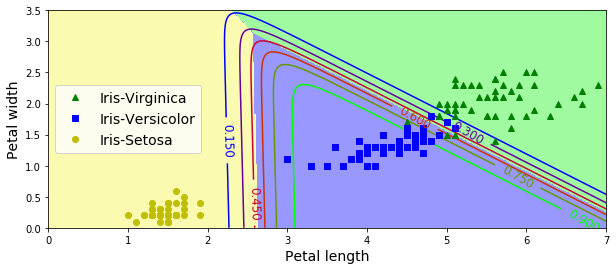

In [78]:
# We plot a decision map
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()